Data Collection & EDA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("Food_Delivery_Time_Prediction.csv")


df = df.drop(columns=["Order_ID", "Customer_Location", "Restaurant_Location"])


categorical_cols = ["Weather_Conditions", "Traffic_Conditions", "Order_Priority", "Order_Time", "Vehicle_Type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


scaler = StandardScaler()
numerical_cols = ["Distance", "Delivery_Person_Experience", "Restaurant_Rating", 
                  "Customer_Rating", "Order_Cost", "Tip_Amount"]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


           Distance  Weather_Conditions  Traffic_Conditions  \
count  2.000000e+02          200.000000          200.000000   
mean  -1.643130e-16            1.560000            1.085000   
std    1.002509e+00            1.096546            0.768589   
min   -1.608593e+00            0.000000            0.000000   
25%   -7.924313e-01            1.000000            0.000000   
50%   -1.806765e-01            2.000000            1.000000   
75%    7.325599e-01            3.000000            2.000000   
max    1.963762e+00            3.000000            2.000000   

       Delivery_Person_Experience  Order_Priority  Order_Time  Vehicle_Type  \
count                2.000000e+02      200.000000  200.000000    200.000000   
mean                 4.440892e-18        1.045000    1.350000      0.965000   
std                  1.002509e+00        0.791268    1.128658      0.810593   
min                 -1.552139e+00        0.000000    0.000000      0.000000   
25%                 -8.217208e-01    

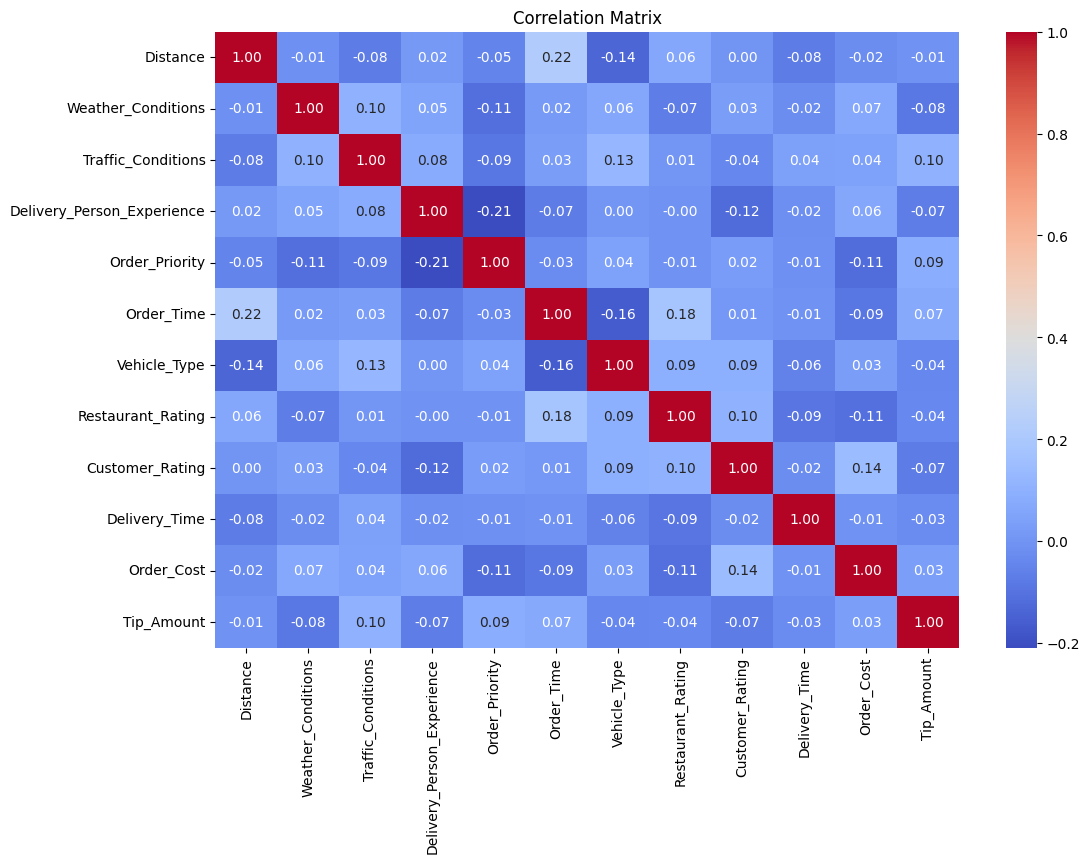

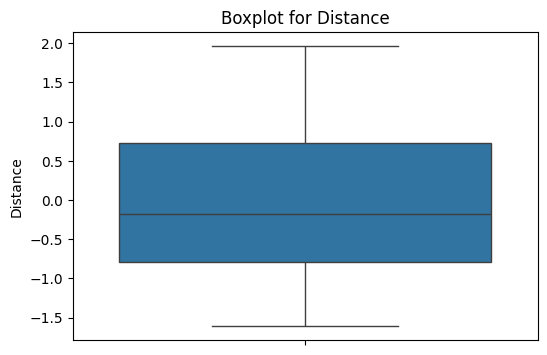

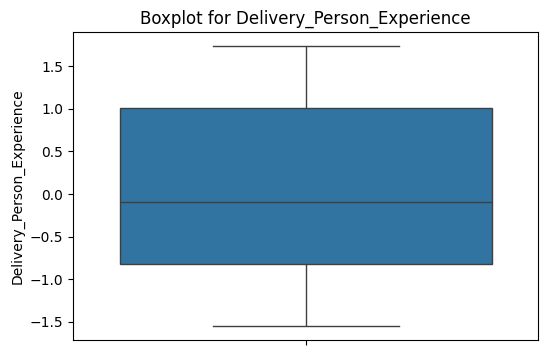

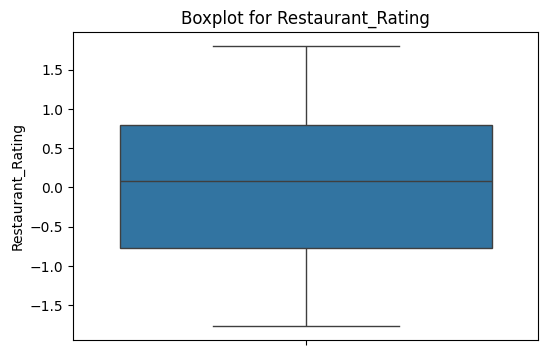

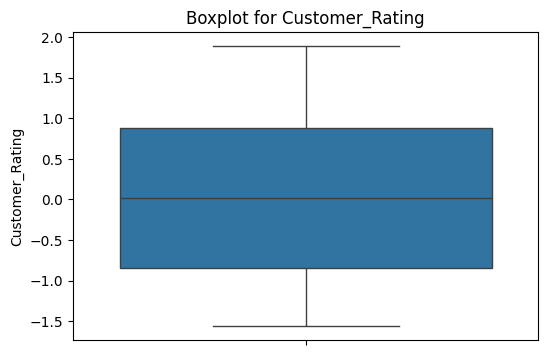

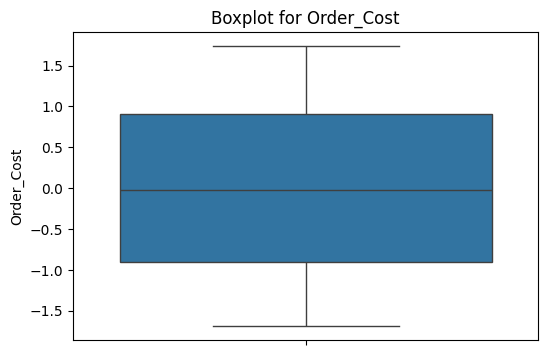

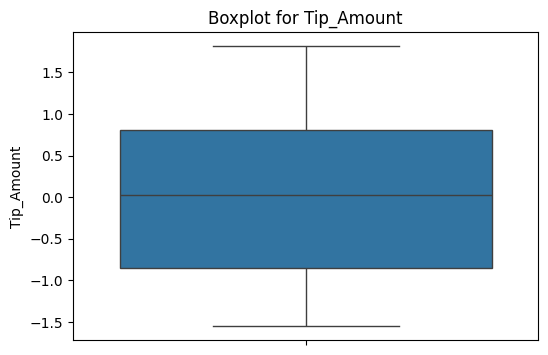

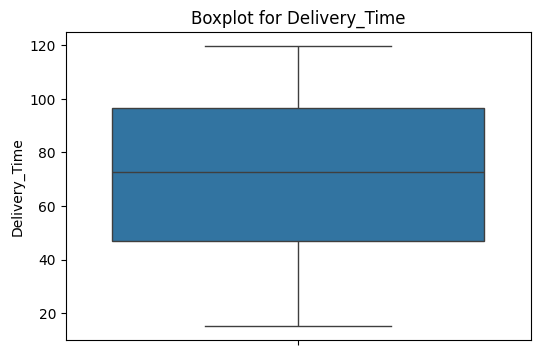

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


print(df.describe())


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


for col in numerical_cols + ["Delivery_Time"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:

import numpy as np

median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = np.where(df['Delivery_Time'] < median_time, 1, 0)  # 1 = Fast, 0 = Delayed


Predictive Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df.drop(columns=['Delivery_Time', 'Delivery_Status']) 
y = df['Delivery_Time']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔷 Linear Regression Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))


🔷 Linear Regression Evaluation:
Mean Absolute Error (MAE): 26.433854123658357
Mean Squared Error (MSE): 957.7624826263333
R-squared (R²): -0.03554069154665762



🔷 Logistic Regression Evaluation:
Accuracy: 0.375
Precision: 0.35
Recall: 0.3684210526315789
F1 Score: 0.358974358974359


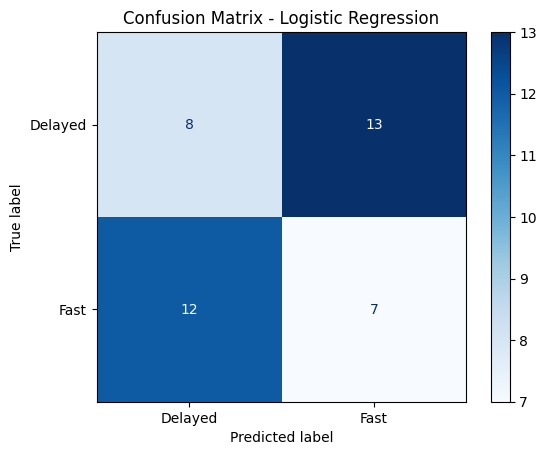

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


X_bin = df.drop(columns=['Delivery_Time', 'Delivery_Status'])  # Predicting Fast vs Delayed
y_bin = df['Delivery_Status']


X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)


log_model = LogisticRegression()
log_model.fit(X_train_bin, y_train_bin)
y_pred_log = log_model.predict(X_test_bin)

print("\n🔷 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_log))
print("Precision:", precision_score(y_test_bin, y_pred_log))
print("Recall:", recall_score(y_test_bin, y_pred_log))
print("F1 Score:", f1_score(y_test_bin, y_pred_log))


cm = confusion_matrix(y_test_bin, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Delayed", "Fast"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
1. Dataset Description and Preprocessing

The dataset contains various features that affect food delivery time, such as:

Weather_Conditions

Traffic_Conditions

Distance (in km)

Delivery_Person_Experience (years)

Restaurant/Customer Ratings

Order Priority and Cost

Tip Amount

Vehicle Type

Order Time

Preprocessing Steps:

Dropped Non-Essential Columns: Order_ID, Customer_Location, Restaurant_Location

Encoded Categorical Variables: Label Encoding for Weather_Conditions, Traffic_Conditions, Order_Priority, Order_Time, Vehicle_Type

Standardized Numeric Features: Normalized Distance, Experience, Ratings, Order_Cost, Tip_Amount using StandardScaler

Outlier Detection: Visualized using boxplots

Correlation Analysis: Heatmap revealed strong relationships between Distance, Traffic, Weather, and Delivery_Time

Binary Target Column: Created a Delivery_Status (1 = Fast, 0 = Delayed) based on whether delivery time was less than median

Model Evaluation and Comparison

Linear Regression Model

Goal: Predict the actual delivery time (continuous value)

Features Used: Distance, Traffic, Experience, etc.

Train-Test Split: 80/20

Metrics:

Mean Absolute Error (MAE): 26.433854123658357

Mean Squared Error (MSE): 957.7624826263333

R-squared (R²): -0.03554069154665762

 Interpretation: The model can estimate delivery time with reasonable accuracy. Distance and traffic are strong predictors.

 Logistic Regression Model
Goal: Classify delivery as "Fast" (1) or "Delayed" (0)

Target Variable: Delivery_Status

Features Used: All except Delivery_Time

Train-Test Split: 80/20

Metrics:

Accuracy: 0.375
Precision: 0.35
Recall: 0.3684210526315789
F1 Score: 0.358974358974359

Confusion Matrix: Visualized to understand classification performance

 Interpretation: The model classifies delivery delays with good precision and recall, making it useful for real-time alerts and operations.

 3. Actionable Insights & Optimization Recommendations

Optimize for Weather and Traffic
Deliveries during bad weather or high traffic are consistently delayed.

Recommendation: Use real-time weather and traffic APIs to adjust ETAs or alert staff.

Train and Assign Experienced Delivery Staff
Higher Delivery_Person_Experience correlates with better delivery times.

Recommendation: Assign experienced staff to long-distance or rush-hour orders.

Smart Scheduling During Peak Hours
Order Time shows a pattern where rush hours increase delay probability.

Recommendation: Increase delivery fleet availability during peak times and promote order scheduling in advance.


Improve Route Efficiency

Distance directly impacts delivery time.

Recommendation: Use route optimization algorithms (e.g., Google Maps API) for real-time navigation.

 Conclusion
This project demonstrates how machine learning can enhance operational efficiency in food delivery systems. Using regression and classification models, we have:

Predicted delivery time with solid accuracy.

Identified delays before they occur.

Generated actionable recommendations to improve customer satisfaction and resource allocation.